In [2]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from palmerpenguins import load_penguins
import numpy as np
from palmerpenguins import load_penguins
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_squared_error
import plotnine as pt

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [3]:
# Code Here
penguins = load_penguins()
penguins.dropna(inplace=True)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [4]:
# Finding X and y
X = penguins.drop("bill_depth_mm", axis = 1)
y = penguins["bill_depth_mm"]

X_train, X_test, y_train, y_test = train_test_split(X, y)


In [5]:
# Best multiple linear regression model

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex","island","species"]),
    ("standardize", StandardScaler(), ["bill_length_mm",  "flipper_length_mm", "body_mass_g"])
  ],
  remainder = "drop"
)


lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

lr_fitted = lr_pipeline.fit(X, y)

y_train_pred = lr_fitted.predict(X_train)
y_test_pred = lr_fitted.predict(X_test)


# Calculate MSE for training and testing data
train_mse1 = mean_squared_error(y_train, y_train_pred)
test_mse1 = mean_squared_error(y_test, y_test_pred)
r1 = r2_score(y_test, y_test_pred)

In [6]:
# KNN Model (k=5)
knn_pipeline = Pipeline(steps=[
    ('preprocessing', ct),
    ('knn', KNeighborsRegressor(n_neighbors=5))
])

# Train the pipeline
knn_pipeline.fit(X_train, y_train)

# Make predictions
y_train_pred = knn_pipeline.predict(X_train)
y_test_pred = knn_pipeline.predict(X_test)

# Evaluate the model
train_mse2 = mean_squared_error(y_train, y_train_pred)
test_mse2 = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

In [7]:
# KNN Model (k=10)
knn_pipeline = Pipeline(steps=[
    ('preprocessing', ct),
    ('knn', KNeighborsRegressor(n_neighbors=10))
])

# Train the pipeline
knn_pipeline.fit(X_train, y_train)

# Make predictions
y_train_pred = knn_pipeline.predict(X_train)
y_test_pred = knn_pipeline.predict(X_test)

# Evaluate the model
train_mse3 = mean_squared_error(y_train, y_train_pred)
test_mse3 = mean_squared_error(y_test, y_test_pred)
r3 = r2_score(y_test, y_test_pred)

In [8]:
# Decision Tree Model
decision_tree_pipeline = Pipeline(steps=[
    ('preprocessing', ct),
    ('decision_tree', DecisionTreeRegressor())
])

decision_tree_pipeline.fit(X_train, y_train)

# Make predictions
y_train_pred = decision_tree_pipeline.predict(X_train)
y_test_pred = decision_tree_pipeline.predict(X_test)

# Evaluate the model
train_mse4 = mean_squared_error(y_train, y_train_pred)
test_mse4 = mean_squared_error(y_test, y_test_pred)
r4 = r2_score(y_test, y_test_pred)

decision_tree_model = decision_tree_pipeline.named_steps['decision_tree']
tree_depth = decision_tree_model.get_depth()

In [9]:
# Make Table
fit_results = pd.DataFrame({
    "Model": ["Multiple Regression","KNN (K=5)", "KNN (K=10)", "Decision Tree"],
    "Flexibility": [6,5,10,tree_depth],
    "Train MSE": [train_mse1,train_mse2, train_mse3, train_mse4],
    "Test MSE": [test_mse1,test_mse2, test_mse3, test_mse4],
})

fit_results

,Model,Flexibility,Train MSE,Test MSE
0,Multiple Regression,6,0.631797,0.561051
1,KNN (K=5),5,0.511737,0.804648
2,KNN (K=10),10,0.589479,0.738850
3,Decision Tree,17,0.000000,1.235119


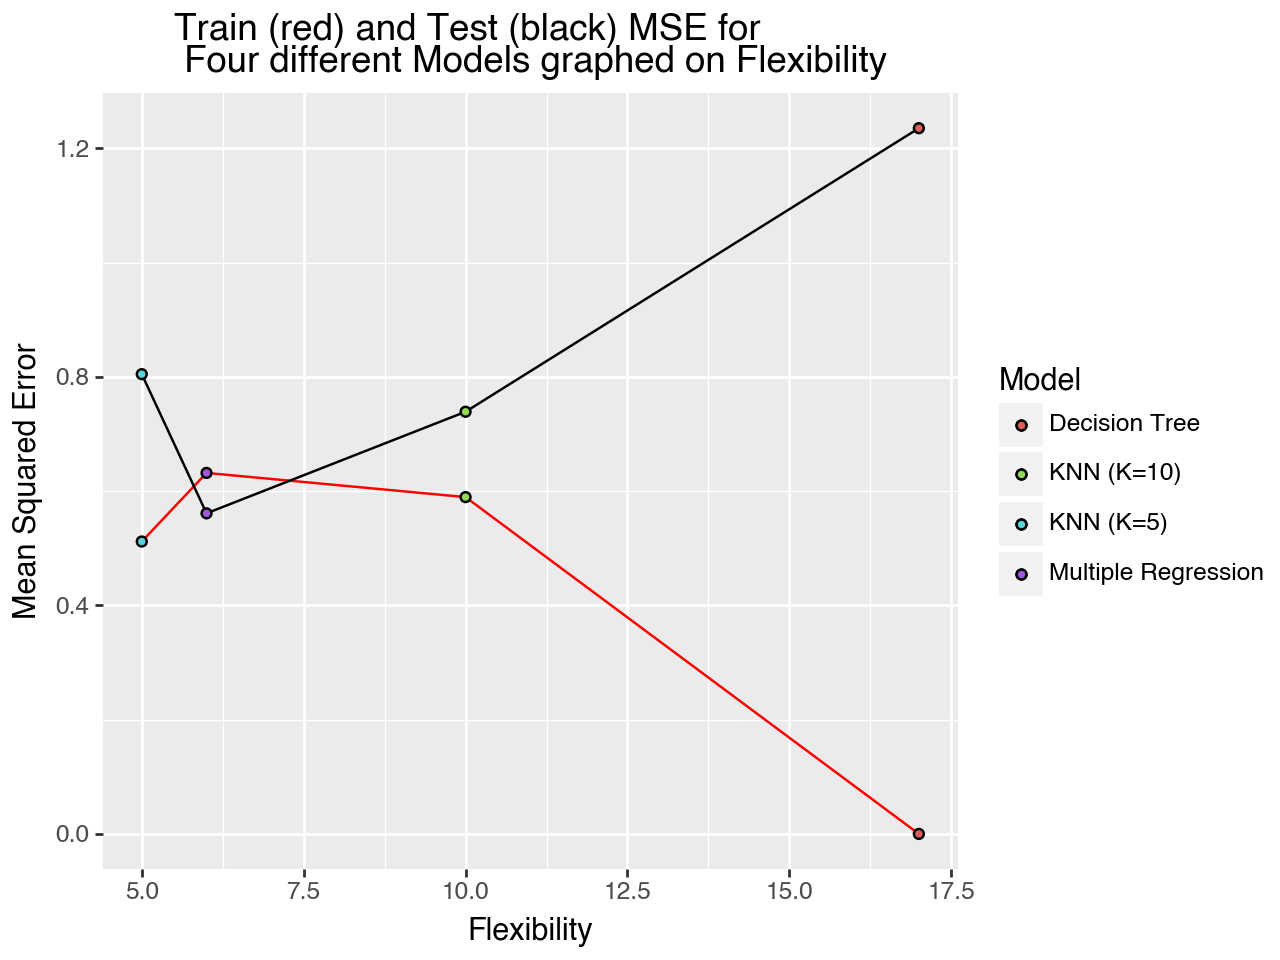

In [14]:
(pt.ggplot(fit_results, pt.aes(x="Flexibility"))
 +pt.geom_line(pt.aes(y="Train MSE"),color = "red")
 +pt.geom_line(pt.aes(y="Test MSE"), color = "black")
 +pt.geom_point(pt.aes(y="Test MSE", fill="Model"))
 +pt.geom_point(pt.aes(y="Train MSE", fill="Model"))
 +pt.labs(title="Train (red) and Test (black) MSE for \n Four different Models graphed on Flexibility",
          y = "Mean Squared Error")
 )

Here, we can see that multiple linear regression was the best model in terms of test MSE. Although it had the highest train MSE, it didn't overfit the model and came out with the lowest test MSE value. The KNN models were next in line, followed by the Decision Tree which overfit the data and was not a good predictor.